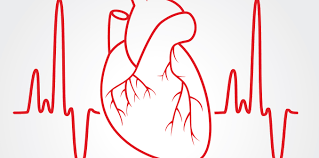

> # Project Title: "EKG Analytics: A Machine Learning Framework for Cardiac Arrythmia Identification based on resemble technique"



In [ ]:
import tensorflow as tf
print("GPU available:", tf.config.list_physical_devices('GPU'))


GPU available: []


In [ ]:
#Required Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/MIT-BIH Arrhythmia Database.csv')
df2=pd.read_csv('/content/drive/MyDrive/INCART 2-lead Arrhythmia Database.csv')
df3=pd.read_csv('/content/drive/MyDrive/Sudden Cardiac Death Holter Database.csv')
df4=pd.read_csv('/content/drive/MyDrive/MIT-BIH Supraventricular Arrhythmia Database.csv')


<ipython-input-3-17e8516750c5>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df3=pd.read_csv('/content/drive/MyDrive/Sudden Cardiac Death Holter Database.csv')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIT-BIH Supraventricular Arrhythmia Database.csv')

In [ ]:
df

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,800,N,168.0,167.0,-0.000659,-0.076691,1.079977,-0.958842,-0.009849,10,...,-0.072295,7,3,14,4,-0.072295,-0.055469,0.003311,0.077157,0.060548
1,800,N,167.0,169.0,-0.007237,-0.080968,1.117509,-0.993945,-0.037873,14,...,-0.011806,1,2,6,3,-0.011806,-0.011806,-0.011806,-0.011806,-0.011806
2,800,N,169.0,170.0,-0.015322,-0.065713,1.091163,-0.984797,-0.047307,15,...,-0.009710,0,2,4,2,-0.009710,-0.009710,-0.009710,-0.009710,-0.009710
3,800,N,170.0,166.0,-0.011573,-0.067132,1.075468,-0.912288,-0.018548,11,...,-0.060843,9,3,16,4,-0.060843,-0.055684,0.011955,0.039944,0.066575
4,800,N,166.0,169.0,-0.004269,-0.081436,1.163276,-0.991680,-0.013624,10,...,-0.029659,2,3,8,3,-0.029659,-0.029659,-0.029659,-0.005076,-0.005076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184423,894,N,102.0,96.0,0.011782,-0.702667,2.537575,-1.717832,-0.019031,15,...,-0.366454,2,6,12,4,-0.366454,-0.366454,-0.366454,-0.489696,-0.489696
184424,894,N,96.0,27.0,0.151691,-1.074162,2.549375,-1.553742,0.028627,14,...,-0.489704,2,6,12,4,-0.489704,-0.489704,-0.489704,-0.710598,-0.710598
184425,894,N,79.0,96.0,0.037697,0.402691,2.431716,-1.536314,0.032153,14,...,-0.225756,2,1,6,3,-0.225756,-0.225756,-0.225756,-0.505484,-0.505484
184426,894,N,96.0,59.0,-0.021873,-0.301590,2.621748,-1.815166,-0.025689,17,...,-0.367450,3,4,11,4,-0.367450,-0.367450,-0.326364,-0.326364,-0.423273


In [ ]:
d=pd.read_csv('/content/drive/MyDrive/MIT-BIH Arrhythmia Database.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

d['type'] = label_encoder.fit_transform(d['type'])

print(df)

        record  type  0_pre-RR  0_post-RR   0_pPeak   0_tPeak   0_rPeak  \
0          800     N     168.0      167.0 -0.000659 -0.076691  1.079977   
1          800     N     167.0      169.0 -0.007237 -0.080968  1.117509   
2          800     N     169.0      170.0 -0.015322 -0.065713  1.091163   
3          800     N     170.0      166.0 -0.011573 -0.067132  1.075468   
4          800     N     166.0      169.0 -0.004269 -0.081436  1.163276   
...        ...   ...       ...        ...       ...       ...       ...   
184423     894     N     102.0       96.0  0.011782 -0.702667  2.537575   
184424     894     N      96.0       27.0  0.151691 -1.074162  2.549375   
184425     894     N      79.0       96.0  0.037697  0.402691  2.431716   
184426     894     N      96.0       59.0 -0.021873 -0.301590  2.621748   
184427     894  SVEB      59.0       45.0  0.177298 -1.236111  3.062606   

         0_sPeak   0_qPeak  0_qrs_interval  ...   1_qPeak  1_qrs_interval  \
0      -0.958842 -0.00

In [ ]:
import random
import matplotlib.pyplot as plt
d['type']=d['type'].astype(int)

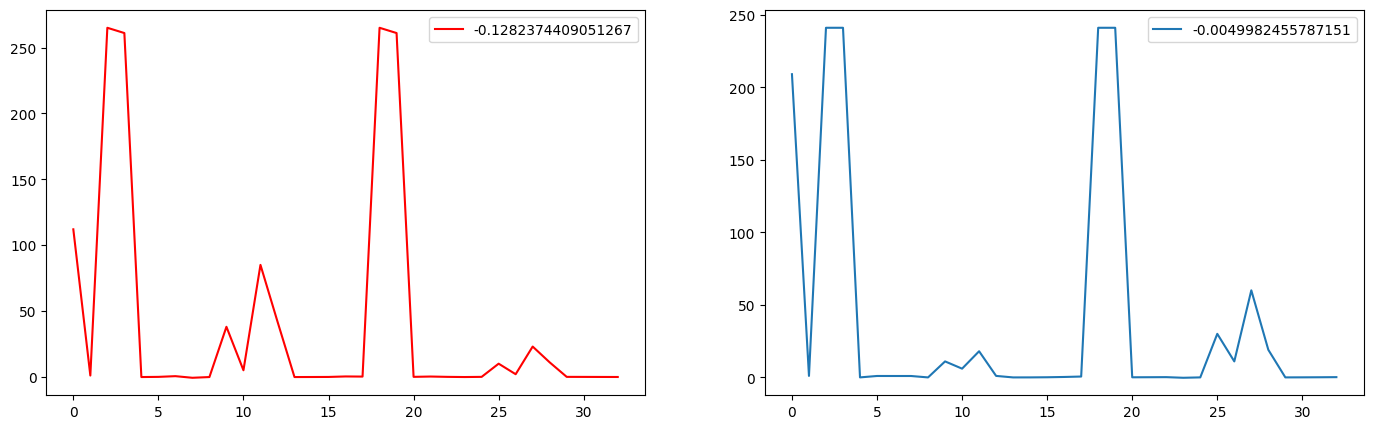

In [ ]:
plt.figure(figsize=(17,5))
plt.subplot(121)
test_row_1=np.array(d.iloc[np.random.randint(0,len(d))])
plt.plot(test_row_1[:-1],label=test_row_1[-1],color='r')
plt.legend()

plt.subplot(122)
test_row_2=np.array(d.iloc[np.random.randint(0,len(d))])
plt.plot(test_row_2[:-1],label=test_row_2[-1])
plt.legend()

In [ ]:
# plot ECG data belonging to each class label
label = ["Normal","Supraventricular","Ventricular",
         "Fusion","Unknown"]
color = ['blue','red','green','orange','purple']
fig, ax = plt.subplots(5, 1, sharex=True, sharey=True,figsize=(10,10))
for i, row in enumerate(ax):
    row.plot((d[d['type'] == i].iloc[0])[:-1], label=label[i], color=color[i])
    row.legend()

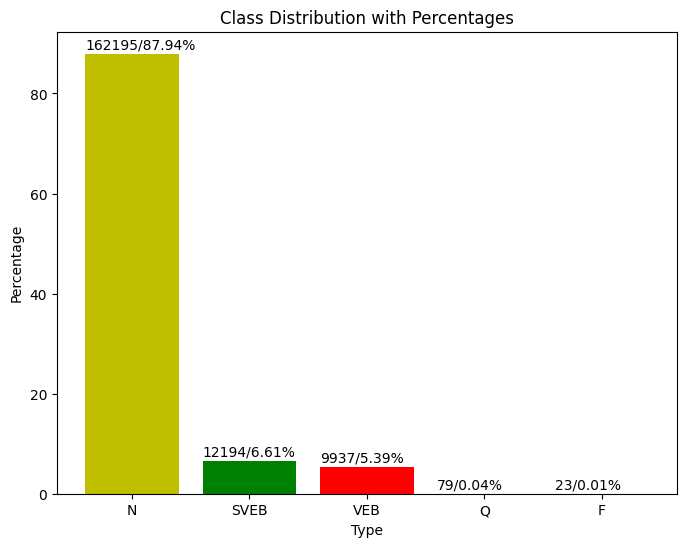

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

target_counts = df['type'].value_counts()

# Calculate percentages
total_samples = len(df)
class_percentages = (target_counts / total_samples) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(class_percentages.index, class_percentages.values, color=['y', 'g', 'r', 'b', 'm'])
plt.xlabel("Type")
plt.ylabel("Percentage")
plt.title("Class Distribution with Percentages")

# Add labels with percentages
for counts,bar, percentage in zip(target_counts,bars, class_percentages.values):
    plt.annotate(f"{counts}/{percentage:.2f}%", (bar.get_x(), percentage + 1))

plt.show()


In [ ]:
data1 = df1[df1["type"].isin(["SVEB","VEB","Q","F"])]
data1

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
360,101,Q,24,357.0,0.049120,1.399257,1.113826,-0.361193,-1.952061,40,...,-0.031889,7,18,39,14,-0.031889,-0.121138,-0.206488,-0.339001,-0.379213
420,101,SVEB,194,426.0,-0.063861,-0.311834,1.283616,-0.320058,-0.098463,23,...,0.002576,3,4,10,3,0.002576,0.002576,0.000681,0.000681,-0.000659
644,101,SVEB,333,414.0,0.035873,-0.351159,1.295646,-0.401133,0.002740,23,...,0.023875,16,3,27,8,0.023875,0.025495,0.029146,0.022849,-0.007689
899,101,Q,386,343.0,-0.189489,1.359877,-0.224210,-0.378801,-0.224210,5,...,0.143144,26,8,133,99,0.143144,0.189707,0.157048,0.050664,-0.201991
1537,101,SVEB,237,459.0,-0.005417,-0.303479,1.355476,-0.323771,-0.105282,22,...,-0.005574,33,5,44,6,-0.005574,-0.005132,0.011613,0.025870,0.018329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99282,234,SVEB,142,148.0,0.149834,-0.357147,1.258818,-0.559149,0.120525,32,...,-0.068301,0,23,33,10,-0.068301,-0.068301,-0.068301,-0.068301,-0.068301
99283,234,SVEB,148,255.0,0.153346,-0.410064,1.310038,-0.575406,0.118494,28,...,-0.037608,0,25,35,10,-0.037608,-0.037608,-0.037608,-0.037608,-0.037608
99517,234,VEB,165,305.0,0.229047,-0.594081,0.759360,-0.630816,0.225232,43,...,-1.073794,1,19,52,32,-1.073794,-1.073794,-1.073794,-1.073794,-1.073794
99917,234,VEB,165,322.0,0.191918,-0.514462,0.609758,-0.519756,0.189679,47,...,-1.011533,0,20,54,34,-1.011533,-1.011533,-1.011533,-1.011533,-1.011533


In [ ]:
df=pd.concat([df,data1],axis=0)
df

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,800,N,168.0,167.0,-0.000659,-0.076691,1.079977,-0.958842,-0.009849,10,...,-0.072295,7,3,14,4,-0.072295,-0.055469,0.003311,0.077157,0.060548
1,800,N,167.0,169.0,-0.007237,-0.080968,1.117509,-0.993945,-0.037873,14,...,-0.011806,1,2,6,3,-0.011806,-0.011806,-0.011806,-0.011806,-0.011806
2,800,N,169.0,170.0,-0.015322,-0.065713,1.091163,-0.984797,-0.047307,15,...,-0.009710,0,2,4,2,-0.009710,-0.009710,-0.009710,-0.009710,-0.009710
3,800,N,170.0,166.0,-0.011573,-0.067132,1.075468,-0.912288,-0.018548,11,...,-0.060843,9,3,16,4,-0.060843,-0.055684,0.011955,0.039944,0.066575
4,800,N,166.0,169.0,-0.004269,-0.081436,1.163276,-0.991680,-0.013624,10,...,-0.029659,2,3,8,3,-0.029659,-0.029659,-0.029659,-0.005076,-0.005076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99282,234,SVEB,142.0,148.0,0.149834,-0.357147,1.258818,-0.559149,0.120525,32,...,-0.068301,0,23,33,10,-0.068301,-0.068301,-0.068301,-0.068301,-0.068301
99283,234,SVEB,148.0,255.0,0.153346,-0.410064,1.310038,-0.575406,0.118494,28,...,-0.037608,0,25,35,10,-0.037608,-0.037608,-0.037608,-0.037608,-0.037608
99517,234,VEB,165.0,305.0,0.229047,-0.594081,0.759360,-0.630816,0.225232,43,...,-1.073794,1,19,52,32,-1.073794,-1.073794,-1.073794,-1.073794,-1.073794
99917,234,VEB,165.0,322.0,0.191918,-0.514462,0.609758,-0.519756,0.189679,47,...,-1.011533,0,20,54,34,-1.011533,-1.011533,-1.011533,-1.011533,-1.011533


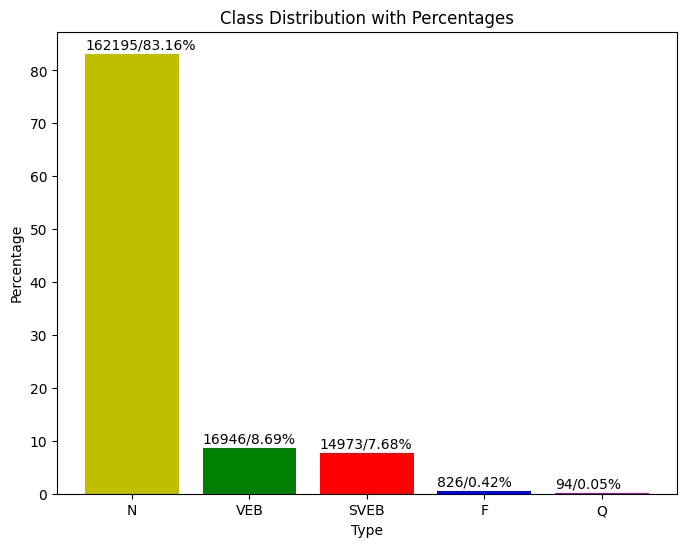

In [ ]:
target_counts = df['type'].value_counts()

# Calculate percentages
total_samples = len(df)
class_percentages = (target_counts / total_samples) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(class_percentages.index, class_percentages.values, color=['y', 'g', 'r', 'b', 'm'])
plt.xlabel("Type")
plt.ylabel("Percentage")
plt.title("Class Distribution with Percentages")

# Add labels with percentages
for counts,bar, percentage in zip(target_counts,bars, class_percentages.values):
    plt.annotate(f"{counts}/{percentage:.2f}%", (bar.get_x(), percentage + 1))

plt.show()

In [ ]:
data2 = df2[df2["type"].isin(["SVEB","VEB","Q","F"])]
data2

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
3,I01,VEB,102,231,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4,...,0.046898,21,9,34,4,0.046898,0.083728,0.279512,0.526785,0.450969
15,I01,VEB,99,229,0.009672,0.202892,-0.337828,-0.812391,-0.337828,4,...,0.109772,35,2,65,28,0.109772,0.277229,0.638235,0.112592,-0.052973
31,I01,VEB,107,239,0.304862,0.285580,-0.002046,-0.715299,-0.002046,4,...,0.017242,21,11,33,1,0.017242,0.067571,0.287925,0.539990,0.336919
51,I01,VEB,98,226,0.144860,0.384033,-0.214091,-0.638429,-0.214091,3,...,-0.004466,22,6,31,3,-0.004466,0.095297,0.397962,0.708529,0.411453
66,I01,VEB,98,222,-0.038686,0.346516,-0.257670,-0.820442,-0.257670,4,...,0.028408,38,4,56,14,0.028408,0.135048,0.570521,0.219877,0.060308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175709,I75,VEB,197,263,0.031650,0.949343,-1.318861,-2.142985,-1.318861,5,...,0.006549,23,4,28,1,0.006549,0.025891,0.065836,0.255304,1.092265
175714,I75,VEB,180,298,0.018394,1.270607,-1.728137,-2.124024,-1.728137,3,...,-0.006991,36,4,44,4,-0.006991,0.042691,0.360628,1.608053,1.234509
175716,I75,VEB,196,266,0.025950,0.915683,-1.223064,-1.974599,-1.223064,5,...,-0.003123,25,2,28,1,-0.003123,0.014134,0.055705,0.289422,1.050551
175722,I75,VEB,156,300,0.160952,1.137787,-1.617034,-2.129773,-1.617034,4,...,-0.198954,70,36,110,4,-0.198954,-0.142696,-0.047772,0.045751,1.612014


In [ ]:
df=pd.concat([df,data2],axis=0)
df

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,800,N,168.0,167.0,-0.000659,-0.076691,1.079977,-0.958842,-0.009849,10,...,-0.072295,7,3,14,4,-0.072295,-0.055469,0.003311,0.077157,0.060548
1,800,N,167.0,169.0,-0.007237,-0.080968,1.117509,-0.993945,-0.037873,14,...,-0.011806,1,2,6,3,-0.011806,-0.011806,-0.011806,-0.011806,-0.011806
2,800,N,169.0,170.0,-0.015322,-0.065713,1.091163,-0.984797,-0.047307,15,...,-0.009710,0,2,4,2,-0.009710,-0.009710,-0.009710,-0.009710,-0.009710
3,800,N,170.0,166.0,-0.011573,-0.067132,1.075468,-0.912288,-0.018548,11,...,-0.060843,9,3,16,4,-0.060843,-0.055684,0.011955,0.039944,0.066575
4,800,N,166.0,169.0,-0.004269,-0.081436,1.163276,-0.991680,-0.013624,10,...,-0.029659,2,3,8,3,-0.029659,-0.029659,-0.029659,-0.005076,-0.005076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175709,I75,VEB,197.0,263.0,0.031650,0.949343,-1.318861,-2.142985,-1.318861,5,...,0.006549,23,4,28,1,0.006549,0.025891,0.065836,0.255304,1.092265
175714,I75,VEB,180.0,298.0,0.018394,1.270607,-1.728137,-2.124024,-1.728137,3,...,-0.006991,36,4,44,4,-0.006991,0.042691,0.360628,1.608053,1.234509
175716,I75,VEB,196.0,266.0,0.025950,0.915683,-1.223064,-1.974599,-1.223064,5,...,-0.003123,25,2,28,1,-0.003123,0.014134,0.055705,0.289422,1.050551
175722,I75,VEB,156.0,300.0,0.160952,1.137787,-1.617034,-2.129773,-1.617034,4,...,-0.198954,70,36,110,4,-0.198954,-0.142696,-0.047772,0.045751,1.612014


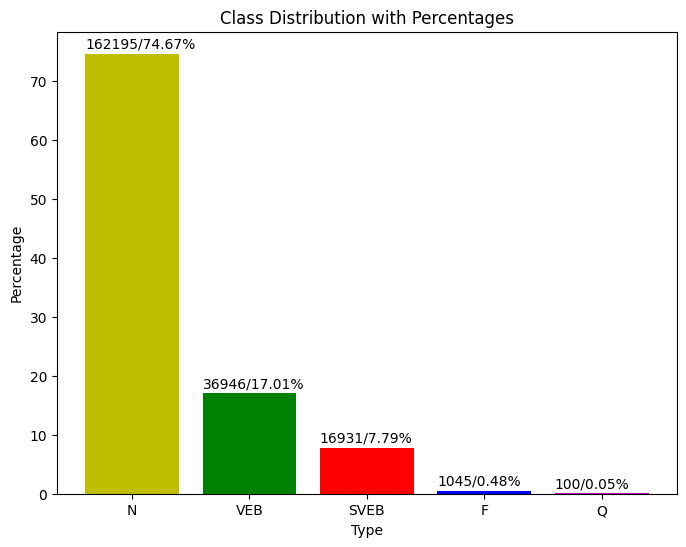

In [ ]:
target_counts = df['type'].value_counts()

# Calculate percentages
total_samples = len(df)
class_percentages = (target_counts / total_samples) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(class_percentages.index, class_percentages.values, color=['y', 'g', 'r', 'b', 'm'])
plt.xlabel("Type")
plt.ylabel("Percentage")
plt.title("Class Distribution with Percentages")

# Add labels with percentages
for counts,bar, percentage in zip(target_counts,bars, class_percentages.values):
    plt.annotate(f"{counts}/{percentage:.2f}%", (bar.get_x(), percentage + 1))

plt.show()

In [ ]:
nan_count = df3.isna().sum()
print(nan_count)

record             76217
type               76217
0_pre-RR           76217
0_post-RR          76217
0_pPeak            76217
0_tPeak            76217
0_rPeak            76217
0_sPeak            76217
0_qPeak            76217
0_qrs_interval     76217
0_pq_interval      76217
0_qt_interval      76217
0_st_interval      76217
0_qrs_morph0       76217
0_qrs_morph1       76217
0_qrs_morph2       76217
0_qrs_morph3       76217
0_qrs_morph4       76217
1_pre-RR          174615
1_post-RR         174615
1_pPeak           174615
1_tPeak           174615
1_rPeak           174615
1_sPeak           174615
1_qPeak           174615
1_qrs_interval    174615
1_pq_interval     174615
1_qt_interval     174615
1_st_interval     174615
1_qrs_morph0      174615
1_qrs_morph1      174615
1_qrs_morph2      174615
1_qrs_morph3      174615
1_qrs_morph4      174615
dtype: int64


In [ ]:
df3.fillna(df3.mean(numeric_only=True), inplace=True)

In [ ]:
df3.dropna(subset=['type'], inplace=True)

In [ ]:
nan_count = df3.isna().sum()
print(nan_count)

record            0
type              0
0_pre-RR          0
0_post-RR         0
0_pPeak           0
0_tPeak           0
0_rPeak           0
0_sPeak           0
0_qPeak           0
0_qrs_interval    0
0_pq_interval     0
0_qt_interval     0
0_st_interval     0
0_qrs_morph0      0
0_qrs_morph1      0
0_qrs_morph2      0
0_qrs_morph3      0
0_qrs_morph4      0
1_pre-RR          0
1_post-RR         0
1_pPeak           0
1_tPeak           0
1_rPeak           0
1_sPeak           0
1_qPeak           0
1_qrs_interval    0
1_pq_interval     0
1_qt_interval     0
1_st_interval     0
1_qrs_morph0      0
1_qrs_morph1      0
1_qrs_morph2      0
1_qrs_morph3      0
1_qrs_morph4      0
dtype: int64


In [ ]:
data3 = df3[df3["type"].isin(["SVEB","VEB","Q", "F"])]
data3

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
18,30.0,VEB,182.0,200.0,0.006435,0.390177,-0.624902,-1.186311,-0.624902,4.0,...,-1.133567,4.0,32.0,42.0,6.0,-1.133567,-1.133567,-1.100321,-0.975079,-0.778462
102,30.0,VEB,120.0,238.0,0.007392,0.621240,0.733865,-0.830411,0.006905,49.0,...,0.010333,48.0,2.0,104.0,54.0,0.010333,0.189903,0.733281,0.343993,-0.286268
177,30.0,VEB,128.0,252.0,-0.015062,0.664688,1.031789,-0.919885,-0.157517,63.0,...,-0.154216,66.0,11.0,128.0,51.0,-0.154216,-0.005366,0.523292,0.619443,-0.366085
213,31.0,VEB,140.0,232.0,0.031706,0.052313,0.225810,-0.215464,0.031179,25.0,...,-0.337696,3.0,12.0,25.0,10.0,-0.337696,-0.337696,-0.327051,-0.327051,-0.304512
228,31.0,VEB,130.0,246.0,0.112208,0.137110,-0.058100,-0.288093,-0.058100,6.0,...,-0.246173,2.0,1.0,20.0,17.0,-0.246173,-0.246173,-0.246173,-0.245395,-0.245395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492357,52.0,VEB,80.0,228.0,-0.351873,0.246167,0.776481,-0.893045,-0.418734,52.0,...,-0.117729,27.0,36.0,65.0,2.0,-0.117729,-0.014939,0.297874,0.291091,-0.056439
492360,52.0,VEB,74.0,246.0,0.210116,0.837815,0.731593,0.731593,0.061915,10.0,...,-0.126211,2.0,7.0,20.0,11.0,-0.126211,-0.126211,-0.126211,-0.113743,-0.113743
492503,52.0,VEB,88.0,232.0,-0.092441,0.191284,0.925802,-0.689266,-0.128525,42.0,...,-0.364956,22.0,67.0,92.0,3.0,-0.364956,-0.227372,0.176272,0.415613,0.159954
492702,52.0,VEB,150.0,162.0,0.798030,0.111455,1.226696,-1.623070,0.790097,29.0,...,-0.982474,0.0,17.0,25.0,8.0,-0.982474,-0.982474,-0.982474,-0.982474,-0.982474


In [ ]:
df=pd.concat([df,data3],axis=0)
df

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,800,N,168.0,167.0,-0.000659,-0.076691,1.079977,-0.958842,-0.009849,10.0,...,-0.072295,7.0,3.0,14.0,4.0,-0.072295,-0.055469,0.003311,0.077157,0.060548
1,800,N,167.0,169.0,-0.007237,-0.080968,1.117509,-0.993945,-0.037873,14.0,...,-0.011806,1.0,2.0,6.0,3.0,-0.011806,-0.011806,-0.011806,-0.011806,-0.011806
2,800,N,169.0,170.0,-0.015322,-0.065713,1.091163,-0.984797,-0.047307,15.0,...,-0.009710,0.0,2.0,4.0,2.0,-0.009710,-0.009710,-0.009710,-0.009710,-0.009710
3,800,N,170.0,166.0,-0.011573,-0.067132,1.075468,-0.912288,-0.018548,11.0,...,-0.060843,9.0,3.0,16.0,4.0,-0.060843,-0.055684,0.011955,0.039944,0.066575
4,800,N,166.0,169.0,-0.004269,-0.081436,1.163276,-0.991680,-0.013624,10.0,...,-0.029659,2.0,3.0,8.0,3.0,-0.029659,-0.029659,-0.029659,-0.005076,-0.005076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492357,52.0,VEB,80.0,228.0,-0.351873,0.246167,0.776481,-0.893045,-0.418734,52.0,...,-0.117729,27.0,36.0,65.0,2.0,-0.117729,-0.014939,0.297874,0.291091,-0.056439
492360,52.0,VEB,74.0,246.0,0.210116,0.837815,0.731593,0.731593,0.061915,10.0,...,-0.126211,2.0,7.0,20.0,11.0,-0.126211,-0.126211,-0.126211,-0.113743,-0.113743
492503,52.0,VEB,88.0,232.0,-0.092441,0.191284,0.925802,-0.689266,-0.128525,42.0,...,-0.364956,22.0,67.0,92.0,3.0,-0.364956,-0.227372,0.176272,0.415613,0.159954
492702,52.0,VEB,150.0,162.0,0.798030,0.111455,1.226696,-1.623070,0.790097,29.0,...,-0.982474,0.0,17.0,25.0,8.0,-0.982474,-0.982474,-0.982474,-0.982474,-0.982474


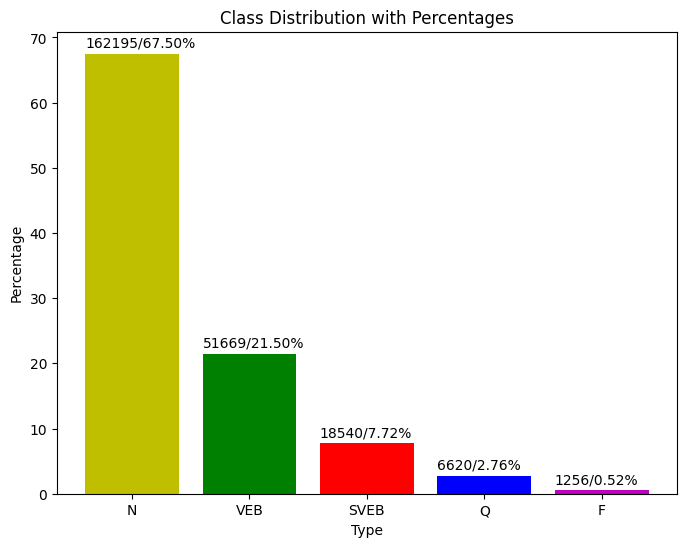

In [ ]:
target_counts = df['type'].value_counts()

# Calculate percentages
total_samples = len(df)
class_percentages = (target_counts / total_samples) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(class_percentages.index, class_percentages.values, color=['y', 'g', 'r', 'b', 'm'])
plt.xlabel("Type")
plt.ylabel("Percentage")
plt.title("Class Distribution with Percentages")

# Add labels with percentages
for counts,bar, percentage in zip(target_counts,bars, class_percentages.values):
    plt.annotate(f"{counts}/{percentage:.2f}%", (bar.get_x(), percentage + 1))

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['type'] = label_encoder.fit_transform(df['type'])

print(df)

In [ ]:
target_counts = df['type'].value_counts()
print("Class distribution:")
print(target_counts)

Class distribution:
1    162195
4     51669
3     18540
2      6620
0      1256
Name: type, dtype: int64


Normal beat ('N'): 0 Supraventricular ectopic beats ('S'): 1 Ventricular ectopic beats ('V'): 2 Fusion Beats ('F'): 3 Unknown Beats ('Q'): 4

In [ ]:
a=df.isnull().mean().mean()*100
print(a)

0.0


In [ ]:
x_data = df.iloc[:, 2:]
df['type'] = df['type'].apply(lambda x: 0 if x == 1 else 1)
y = df[['type']]

([<matplotlib.patches.Wedge at 0x790ad6f12650>,
 [Text(-0.5748220417746531, 0.9378590620610429, 'Normal'),
  Text(0.5748221295833531, -0.9378590082423153, 'Arrythmia')],
 [Text(-0.3135392955134471, 0.5115594883969324, '67.5%'),
  Text(0.31353934340910167, -0.5115594590412628, '32.5%')])

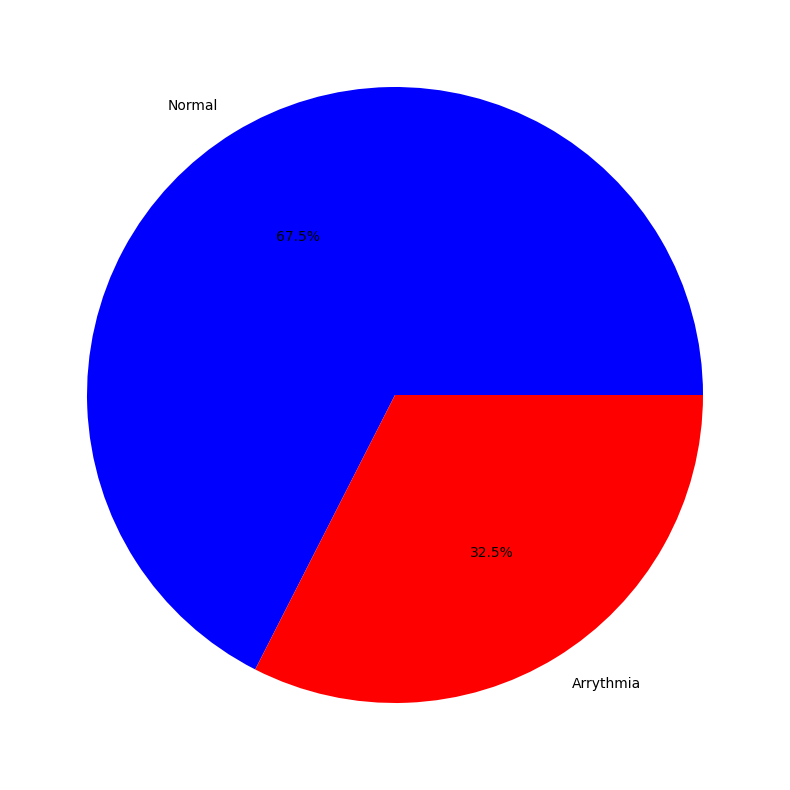

In [ ]:
# plot number of records in each category
plt.figure(figsize=(10,10))
plt.pie(df['type'].value_counts(), labels = ["Normal","Arrythmia"],colors= ['blue','red'],autopct='%2.1f%%')

In [ ]:
target_counts = df['type'].value_counts()
print("Class distribution:")
print(target_counts)

Class distribution:
0    162195
1     78085
Name: type, dtype: int64


In [ ]:
print(y.shape)

(240280, 1)


In [ ]:
# Normalize the feature variables
scaler = StandardScaler()
X = scaler.fit_transform(x_data)

In [ ]:
y = y.values.ravel()
print(y.shape)

(240280,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_test.shape)

(192224, 32)
(48056,)


In [ ]:
adasyn = ADASYN(random_state=42)

X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)

In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
logistic=LogisticRegression(X_train_balanced, y_train_balanced)
logistic.fit()

TypeError: LogisticRegression.__init__() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
svm_linear=svm.SVC(kernel="linear")
svm_linear.fit(X_train_balanced, y_train_balanced)
y_pre_svml=svm_linear.predict(X_test)

In [ ]:
y_series = pd.Series(y_train_balanced)

value_counts = y_series.value_counts()
print(value_counts)

0    129756
1    128788
dtype: int64


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.1, 1, 10,0.01],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [2500,5000]
}


model = LogisticRegression()
lr_cv = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,verbose=2)
lr_cv.fit(X_train_balanced, y_train_balanced)

best_lr_model = lr_cv.best_estimator_
lr_pred = best_lr_model.predict(X_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .C=0.1, max_iter=2500, penalty=l1, solver=liblinear; total time=  21.6s
[CV] END .C=0.1, max_iter=2500, penalty=l1, solver=liblinear; total time=  22.5s
[CV] END .C=0.1, max_iter=2500, penalty=l1, solver=liblinear; total time=  33.6s
[CV] END .C=0.1, max_iter=2500, penalty=l1, solver=liblinear; total time=  13.0s
[CV] END .C=0.1, max_iter=2500, penalty=l1, solver=liblinear; total time=  12.3s
[CV] END ......C=0.1, max_iter=2500, penalty=l1, solver=saga; total time=  39.7s
[CV] END ......C=0.1, max_iter=2500, penalty=l1, solver=saga; total time=  38.4s
[CV] END ......C=0.1, max_iter=2500, penalty=l1, solver=saga; total time=  31.9s
[CV] END ......C=0.1, max_iter=2500, penalty=l1, solver=saga; total time=  39.1s
[CV] END ......C=0.1, max_iter=2500, penalty=l1, solver=saga; total time=  40.5s
[CV] END .C=0.1, max_iter=2500, penalty=l2, solver=liblinear; total time=   4.6s
[CV] END .C=0.1, max_iter=2500, penalty=l2, sol

Precision: 0.81
Recall: 0.90
0.8991801231896122
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     32439
           1       0.81      0.90      0.85     15617

    accuracy                           0.90     48056
   macro avg       0.88      0.90      0.89     48056
weighted avg       0.90      0.90      0.90     48056



Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression')

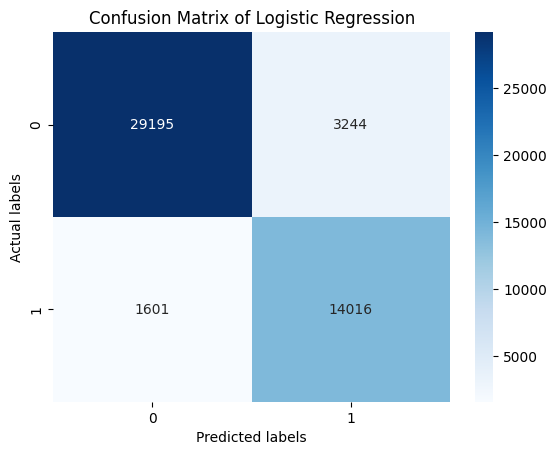

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

precision = precision_score(y_test, lr_pred)
recall = recall_score(y_test, lr_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


lr_acc = accuracy_score(y_test, lr_pred)
print(lr_acc)
report = classification_report(y_test, lr_pred)

# Print the classification report
print(report)
#confusion matrix graph
con = confusion_matrix(y_test, lr_pred)
sns.heatmap(con, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Logistic Regression')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# instantiate & fit
clf = DecisionTreeClassifier(min_samples_split=10,max_depth=3)
clf.fit(X_train_balanced, y_train_balanced)
print("score on test: "  + str(clf.score(X_test, y_test)))


score on test: 0.8722740136507408


In [ ]:
y_test_predictions = clf.predict(X_test)

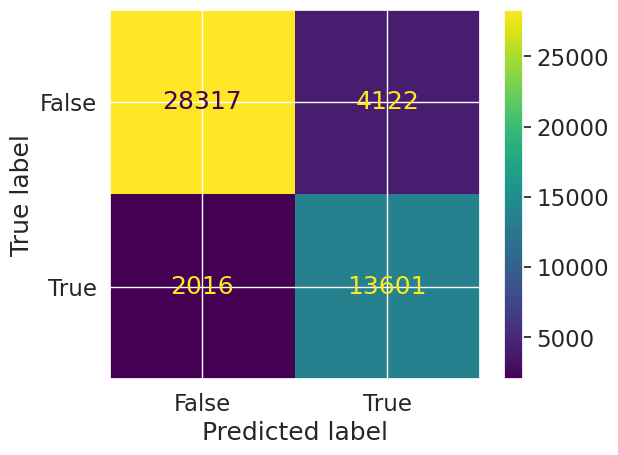

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test,y_test_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
# import all the metrics we'll use later on
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Generate confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, y_test_predictions)
conf_matrix

array([[28317,  4122],
       [ 2016, 13601]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

ValueError: minvalue must be less than or equal to maxvalue

ValueError: minvalue must be less than or equal to maxvalue

<Figure size 640x480 with 1 Axes>

In [ ]:
precision = precision_score(y_test, y_test_predictions)
recall = recall_score(y_test, y_test_predictions)
f1score = f1_score(y_test, y_test_predictions)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.7674208655419511
Recall = 0.8709099058718064
F1 Score = 0.8158968206358728


In [ ]:
# fine-tuning the Decision Tree Classifier
from sklearn.model_selection import GridSearchCV

# instantiate
dtc = DecisionTreeClassifier()

# define paramter grid.
param_grid = [{'min_samples_split': [5, 10, 15, 20], 'max_depth': [3, 6, 9, 12]}]

# define grid-search
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=param_grid,
                          scoring="top_k_accuracy",
                          cv=5,
                          return_train_score=True)

# fit the grid search
grid_search.fit(X_train_balanced, y_train_balanced)

In [ ]:
# get the best estimator
dtc_tuned = grid_search.best_estimator_

# fit the estimator
dtc_tuned.fit(X_train_balanced, y_train_balanced)
print("score on test: "  + str(dtc_tuned.score(X_test, y_test)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate & fit
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(X_train_balanced, y_train_balanced)
print("score on test: " + str(knn.score(X_test, y_test)))


score on test: 0.9711586482437157


In [ ]:
k_y_test_predictions = knn.predict(X_test)

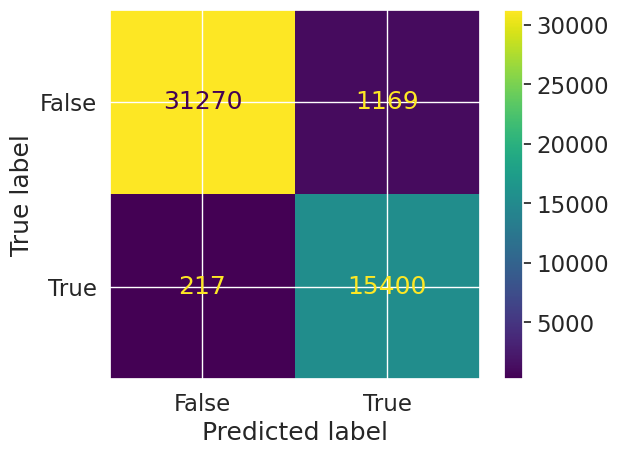

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test,k_y_test_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
precision = precision_score(y_test, k_y_test_predictions)
recall = recall_score(y_test, k_y_test_predictions)
f1score = f1_score(y_test, k_y_test_predictions)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.9294465568229827
Recall = 0.9861048857014791
F1 Score = 0.9569377990430622


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a LogisticRegression model
logistic_model =LogisticRegression()

param_grid = {
    'C': [0.1, 1, 10,0.01],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [2500,5000]
}

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_balanced, y_train_balanced)

best_params = grid_search.best_params_

best_logistic_model = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    max_iter=best_params['max_iter']
)

bagging_logistic = BaggingClassifier(estimator=best_logistic_model, n_estimators=50, bootstrap_features=True, random_state=42)

bagging_logistic.fit(X_train_balanced, y_train_balanced)

y_lr_pred = bagging_logistic.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_lr_pred)
print("Accuracy: ", accuracy)

Normal beat ('N'): 0 Supraventricular ectopic beats ('S'): 1 Ventricular ectopic beats ('V'): 2 Fusion Beats ('F'): 3 Unknown Beats ('Q'): 4